<h1 style="text-align:center;">LAB 4</h1>
<h1 style="text-align:center;">Image Segmentation</h1>
<h3 style="text-align:left; color:blue;">Student Name:</h3>
<h3 style="text-align:left; color:blue;">Student ID:</h3>

<h2 style="text-align:left; color:black;">Introduction</h2>

Image segmentation is one of the key computer vision tasks, It separates objects, boundaries, or structures within the image for more meaningful analysis. Image segmentation plays an important role in extracting meaningful information from images, enabling computers to perceive and understand visual data in a manner that humans understand, view, and perceive.

<h2 style="text-align:left; color:black;">Objective</h2>

In this lab, you'll apply image segmentation using:
* Canny edge detection.
* Global and adaptive thresholding.

<h2 style="text-align:left; color:black;">Instructions</h2>

In [1]:
# Import the needed libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

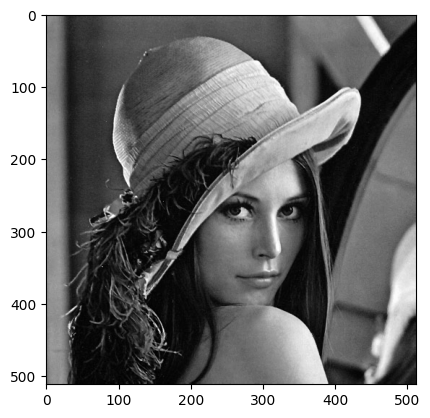

In [2]:
# Read an image from disk
input_image = cv2.imread(filename="lena_gray.png", flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(input_image, cmap="gray")

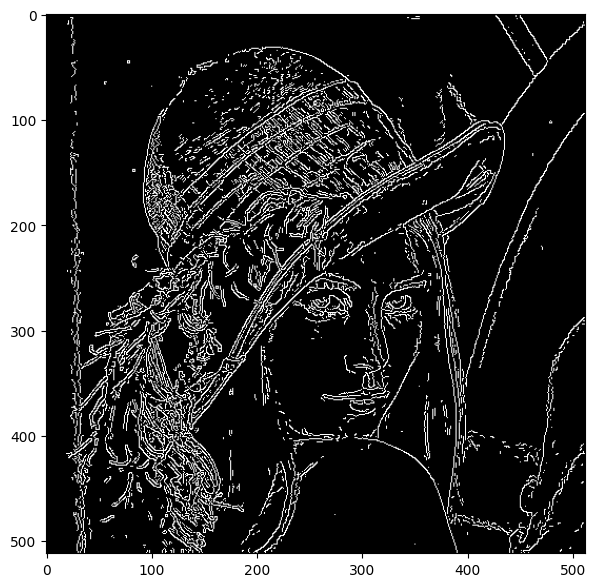

In [3]:
# Apply canny edge detection algorithm on the image
# cv2.Canny() performs all the steps used in Canny detection algorithm:
# 1. Remove the noise in the image with a 5x5 Gaussian filter.
# 2. Find edge gradient and direction for each pixel using Sobel filter (3x3) by default.
#    apertureSize parameter can be used to specify Sobel filter size.
#    By default, the gradient magnitude is approximated to |Gx| + |Gy|.
#    The accurate magnitude can be calculated by setting L2gradient parameter to true.
# 3. Non-maximum suppression
# 4. Hysteresis thresholding. threshold1 parameter specifies the low threshold,
#    while the threshold2 parameter specifies the high threshold.
edges = cv2.Canny(input_image,threshold1=80,threshold2=100, apertureSize=3, L2gradient=False)
plt.subplots(1, 1, figsize=(7, 7))
plt.subplot(1,1,1)
plt.imshow(edges, cmap="gray")

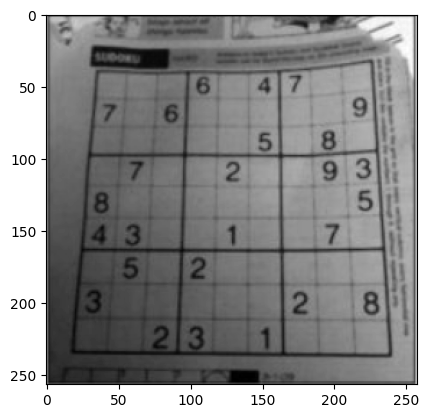

In [4]:
# Read an image affected by illumination from disk
illumin_image = cv2.imread(filename="illumin_effect.PNG", flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(illumin_image, cmap="gray")

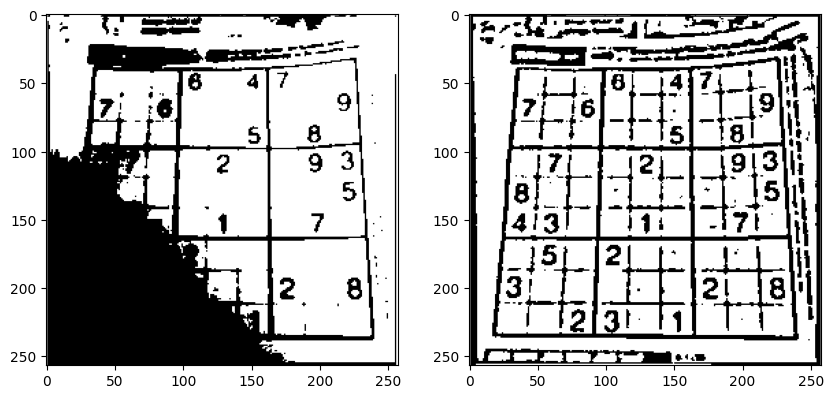

In [5]:
# Apply global and adaptive thresholding, compare the results
ret,th1 = cv2.threshold(illumin_image,100,255,cv2.THRESH_BINARY)
# Adaptive Thresholding
# blockSize parameter is the size of neighbourhood used in calculating the mean
# C parameter is constant c subtracted from the computed mean
# Such that T = mean in a given blockSize- C
th2 = cv2.adaptiveThreshold(illumin_image,maxValue=255,adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,thresholdType=cv2.THRESH_BINARY, blockSize=11, C=5)

plt.subplots(1, 2, figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(th1, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(th2, cmap="gray")